## 3D Cellular Automata
Example for a three-dimensional Moore cellular automata with two possible states.
Every cell interacts with its current state and the twenty six neighbours, which are the cells that are horizontally, vertically or
diagonally adjacent. For this example, we use ndautomata as main library to generate the Automaton class, together with cupy for additional operations and matplotlib to generate some analytic images.

In [1]:
import ndautomata as ca
import matplotlib.pyplot as plt
import cupy as np
from ndautomata import initializers, neighbours

Using the abstract class `ndautomata.BaseAutomaton` we generate the 3DMoore `Automaton` class defining a regular array of 3 dimensions index. Radius is set to 1 to limit the number of neighbours to the 26 closest cells located on the three main dimension axes, diagonals additionally to the own cell state.

In [2]:
class Automaton(ca.BaseAutomaton):
    neighbours = neighbours.regular(ndim=3, r=1)
    states = 2

In this example, we will generate a Generic rule for our cellular automata evolution. To do so, as first step, it is required to generate a connections array space for a rule function with 27 arguments for each of the neighbours:

$$a{_{i,j,k}^{t+1}} = \phi \begin{bmatrix} a{_{i-1,j-1,k-1}^{t}}, & ... & a{_{i+1,j+1,k+1}^{t}} \end{bmatrix}$$

As the space of possible rules is too large to represent as a string ($2^{134217728}$), we can generate a random base rule and set some of the properties. In this case we set every 3rd element in the rule combination to return '0' as next state. 

In [3]:
connections = [Automaton.states] * Automaton.neighbours.size
rule = initializers.random(states=Automaton.states, size=connections)
rule[1::3] = 0  # Constrain for the rule

Once the rule is set, an automata instance can be generated. To do so, we use again the `initializers` module to generate the initial conditions. In this example, we start with a a unique active state *1* located at the center of the initial conditions. All the rest of cells start with the value *0*.

In [4]:
ic = initializers.center(states=Automaton.states, size=[40, 40, 40])
automaton = Automaton(ic, rule)

Finally, with the help of `matplotlib` we can generate a plot with the cellular automaton information. For the aim os simplicity, we will generate 3 plots where each represents on the horizontal axis the average of states on a perpendicular spatial region of a main coordinate, and the vertical axis a time on the evolution process. 

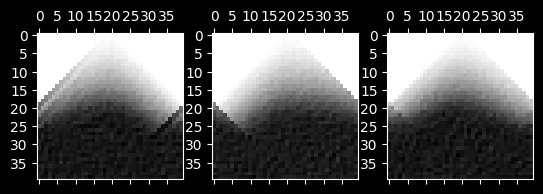

In [5]:
plt.rcParams["image.cmap"] = "binary"
data = np.array([next(automaton).get() for _ in range(40)])
fig, axs = plt.subplots(1, automaton.dimensions)
for dim in range(automaton.dimensions):
    axis = tuple(d + 1 for d in range(automaton.dimensions) if d != dim)
    axs[dim].matshow(np.mean(data, axis=axis).get())
plt.show()

Total runtime is around `0.4s` on a `NVIDIA GeForce RTX 3070`.